In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split,LeaveOneOut,KFold,RepeatedStratifiedKFold
from sklearn.decomposition import PCA,TruncatedSVD,NMF
%matplotlib inline
import matplotlib
#matplotlib.use('agg')
matplotlib.style.use('ggplot')
import pickle as pkl
from matplotlib import pyplot as plt
from collections import Counter
from functools import reduce
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [2]:
compounds=pd.read_csv("/data/dharp/compounding/datasets/compounds_reduced.csv",sep="\t",index_col=0)
compounds=compounds.query('decade != 2000')
compounds=compounds.groupby(['modifier','head','context'])['count'].sum().to_frame()
compounds=compounds.reindex()
compounds

/data/dharp/packages/miniconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


count
modifier        head           context               
a_n             aaaaa_n        a_n                 42
                addison_n      publishing_n       263
                               wesley_n           263
                anti_n         b_n                165
                archive_n      am_n               151
                               general_n          116
                               neurology_n        182
                               psychiatry_n        58
                atom_n         be_v                78
                               occupy_v            36
                b_n            a_n                234
                               b_n                748
                               be_v              1705
                               begin_v             56
                               belong_v            40
                               book_n              32
                               bring_v             28
                               c_n              15801
                               call_v             147
                               child_n             39
                               con_v               64
                               d_n                341
                               even_r             225
                               fig_n              133
                               g_n                 42
                               have_v              98
                               ignorant_a         121
                               infant_n            56
                               know_v            1274
                               learn_v           1724
...                                               ...
zurich_n        conference_n   emphasize_v         50
                government_n   forward_r           40
                               put_v              119
                               strauss_n           80
                seminar_n      broadband_n          2
                               communication_n    371
                               digital_n          612
                               international_n    268
zwemmer_n       gallery_n      exhibition_n        64
                               hold_v              42
                               london_n            39
zwinglische_n   reformation_n  die_n               87
zwitterion_n    form_n         exist_v             14
                intermediate_n proceeds_n         118
                               rearrangement_n     59
                               term_n              59
                mechanism_n    type_n             118
                route_n        attractive_a        57
                               make_v             114
                               substituents_n      57
zygapophyseal_n joint_n        cervical_a          87
                               change_n            44
                               lumbar_a           166
                               source_n            22
zygote_n        nucleus_n      be_v                11
                result_n       division_n          30
                               formation_n         29
zygotene_n      stage_n        meiosis_n           90
zylobalsamum_n  process_n      be_v                23
                               call_v              23

[6048964 rows x 1 columns]

In [3]:
heads=pd.read_csv("/data/dharp/compounding/datasets/heads_reduced.csv",sep="\t")
heads=heads.query('decade != 2000')
heads=heads.groupby(['head','context'])['count'].sum().to_frame()
heads=heads.reindex()
heads

count
head          context                
a_n           a_a                7406
              a_n               36560
              aa_n               2187
              aaa_n              1574
              ab_n                528
              abbreviation_n       44
              ability_n           275
              abolition_n          91
              above_a              54
              abridge_v            43
              absence_n           723
              absolute_a           28
              absorption_n       1705
              abstract_a           32
              abstract_n           10
              abundance_n         187
              academic_n          214
              acceleration_n      132
              accommodate_v       123
              accord_v            316
              accordance_n        486
              account_n           432
              accredited_a         74
              accumulation_n       76
              acetyl_a            314
              acetyl_n           1896
              acetylcholine_a     407
              acetylcholine_n     148
              acid_a              256
              acid_n             1204
...                               ...
zvi_n         greenberg_n          46
              gurion_n            100
              institute_n          33
              poetry_n             75
              yehuda_n            140
zwingli_n     be_v                122
              bear_v               48
              calvin_n            293
              correspondence_n    108
              die_n                44
              heinrich_n           23
              john_n              306
              latin_n              75
              lead_v               28
              leadership_n         97
              luther_n            213
              martin_n            213
              same_a               35
              selected_n          114
              swiss_a              37
              switzerland_n        46
              theology_n          166
              work_n              222
              zurich_n             86
zygmunt_n     bauman_n             27
              have_v               15
zygomycetes_n member_n             32
zygote_n      cultured_a           67
              development_n        42
              genome_n             40

[3766365 rows x 1 columns]

In [4]:
heads_list=heads.reset_index()['head'].unique()
heads_list.shape

(53466,)

In [5]:
modifiers=pd.read_csv("/data/dharp/compounding/datasets/modifiers_reduced.csv",sep="\t")
modifiers=modifiers.query('decade != 2000')
modifiers=modifiers.groupby(['modifier','context'])['count'].sum().to_frame()
modifiers=modifiers.reindex()
modifiers

count
modifier        context               
a_n             a_n                602
                accession_n         20
                account_n           32
                act_n               40
                aleppo_n            42
                almanac_n          111
                alternate_v         34
                am_n               497
                american_a         542
                american_n         541
                americanism_n      101
                analysis_n         137
                analytic_n          76
                anatomy_n           88
                ancient_a           43
                anglo_a             42
                annotated_n        101
                antony_n            43
                archeology_n        61
                architecture_n      37
                archive_n           76
                arm_n              103
                art_n               72
                artistic_n          69
                atlantic_n          56
                attributable_a      87
                auscultation_n      41
                australian_a        94
                b_n               1576
                baghdad_n           99
...                                ...
zurich_n        reformer_n           4
                result_n            19
                schneider_n         48
                school_n           131
                strauss_n           82
                student_n           60
                study_n            150
                technology_n        98
                university_n       186
                work_n              74
zwemmer_n       exhibition_n        70
                hold_v              42
                london_n            45
zwinglische_n   die_n               87
zwitterion_n    attractive_a        58
                exist_v             40
                make_v             116
                proceeds_n         120
                rearrangement_n     60
                substituents_n      58
                term_n              60
                type_n             120
zygapophyseal_n cervical_a          92
                change_n            44
                lumbar_a           168
zygote_n        be_v                42
                division_n          39
zygotene_n      meiosis_n           94
zylobalsamum_n  be_v                33
                call_v              33

[3307882 rows x 1 columns]

In [6]:
modifiers_list=modifiers.reset_index()['modifier'].unique()
modifiers_list.shape

(54400,)

## PPMI , LMI, LL

In [7]:
XY=compounds.groupby(['modifier','head'])['count'].sum().to_frame()
XY.columns=['a']
X_star=compounds.groupby(['modifier'])['count'].sum().to_frame()
X_star.columns=['x_star']
Y_star=compounds.groupby(['head'])['count'].sum().to_frame()
Y_star.columns=['star_y']
merge1=pd.merge(XY.reset_index(),X_star.reset_index(),on=['modifier'])
information_feat=pd.merge(merge1,Y_star.reset_index(),on=['head'])
information_feat['b']=information_feat['x_star']-information_feat['a']
information_feat['c']=information_feat['star_y']-information_feat['a']
information_feat['N']=np.sum(compounds.values)
information_feat['d']=information_feat['N']-(information_feat['a']+information_feat['b']+information_feat['c'])
information_feat['x_bar_star']=information_feat['N']-information_feat['x_star']
information_feat['star_y_bar']=information_feat['N']-information_feat['star_y']
#information_feat['LR']=-2*np.sum(information_feat['a']*np.log2((information_feat['a']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y'])))
information_feat.set_index(['modifier','head'],inplace=True)
information_feat.replace(0,0.001,inplace=True)
information_feat['log_ratio']=2*(information_feat['a']*np.log((information_feat['a']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y']))+\
information_feat['b']*np.log((information_feat['b']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y_bar']))+\
information_feat['c']*np.log((information_feat['c']*information_feat['N'])/(information_feat['x_bar_star']*information_feat['star_y']))+\
information_feat['d']*np.log((information_feat['d']*information_feat['N'])/(information_feat['x_bar_star']*information_feat['star_y_bar'])))
information_feat['ppmi']=np.log2((information_feat['a']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y']))
information_feat['local_mi']=information_feat['a']*information_feat['ppmi']
information_feat.ppmi.loc[information_feat.ppmi<=0]=0
information_feat.drop(['a','x_star','star_y','b','c','d','N','d','x_bar_star','star_y_bar'],axis=1,inplace=True)
information_feat

log_ratio   ppmi  local_mi
modifier        head                                      
a_n             aaaaa_n           768.643 13.202   554.467
                addison_n        5597.137  9.072  4771.785
adherents_n     addison_n       20722.107 16.879 15613.043
century_n       addison_n           0.042  0.000    -0.880
college_n       addison_n         139.797  2.357   198.018
conceits_n      addison_n       10068.160 15.940  7810.423
conferences_n   addison_n        2515.890 13.968  2011.457
department_n    addison_n        1206.972  5.891  1142.898
friend_n        addison_n        1559.618  6.571  1432.470
group_n         addison_n        4835.086  5.603  4594.124
invention_n     addison_n       17165.621 14.173 13620.496
mechanism_n     addison_n        6277.963 13.259  5051.529
mr_n            addison_n         148.592  4.967   149.014
paper_n         addison_n           5.536  0.855    16.243
play_n          addison_n        4388.417  9.051  3747.269
premises_n      addison_n        2479.928 11.467  2041.087
protection_n    addison_n         364.911  4.287   385.840
qualification_n addison_n       12212.498 12.956  9833.538
sales_n         addison_n         233.667  3.380   273.763
secretary_n     addison_n         349.459  5.341   341.820
technology_n    addison_n        3494.581  6.779  3172.493
time_n          addison_n        2963.528  4.029  3154.370
tv_n            addison_n        2334.900  7.515  2074.119
university_n    addison_n        4157.182  5.954  3893.658
view_n          addison_n        6540.036  8.758  5605.021
a_n             anti_n            500.033  3.500   577.490
abm_n           anti_n           2393.441  6.160  2242.115
allied_n        anti_n           1015.671  3.025  1258.203
american_n      anti_n          60161.774  4.052 63414.022
and_n           anti_n            105.947  3.804   117.919
...                                   ...    ...       ...
youth_n         cleinias_n        324.869 12.335   234.357
                convertest_n     1248.248 12.335   900.425
                daggoo_n         5232.673 12.335  3774.384
                diffident_n       530.063 12.335   382.372
                ferrau_n         3830.390 12.335  2762.948
                fidele_n          957.553 12.335   690.737
                greed_n           598.461 12.335   431.711
                hippostratus_n    444.565 12.335   320.699
                innumerous_n     1025.951 12.335   740.075
                jabesh_n         1316.648 12.335   949.763
                tormot_n         1487.646 12.335  1073.109
zealand_n       maories_n        1753.909 12.165  1265.173
                mesozoic_n       1484.070 12.165  1070.531
                savageism_n      2141.805 12.165  1544.971
                tramping_n       8567.823 12.165  6179.884
zebra_n         striping_n        895.899 17.005   646.187
zero_n          froude_n          981.923 18.157   708.130
                mostel_n         8983.615 18.157  6463.958
zeus_n          cadmos_n         6440.745 19.290  4629.550
                olympios_n      14452.214 19.290 10339.328
                olympius_n      24118.829 19.290 17148.625
                polieus_n        8058.374 19.290  5786.938
zhuhai_n        sezs_n           2856.383 24.313  1945.062
zirconia_n      polycrystals_n   2436.539 21.336  1749.551
zocor_n         zocor_n          6650.269 22.867  4573.403
zone_n          aride_n          9518.363 14.481  6863.840
                contigue_n       1686.330 14.481  1216.377
                ophiolites_n     1565.870 14.481  1129.493
zones_n         synaptiques_n    2231.622 17.490  1609.115
zoo_n           pottet_n          231.364 18.544   166.894

[791659 rows x 3 columns]

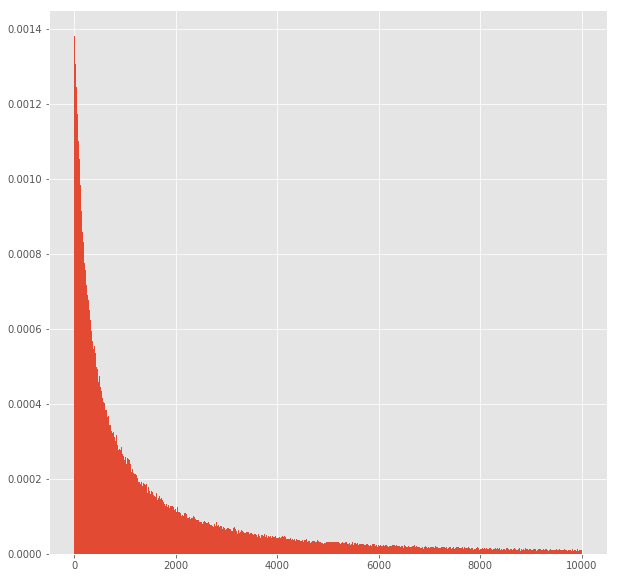

In [8]:
ax = information_feat.local_mi.hist(figsize=(10, 10),bins=1000,range=(0,10000),density=True)
#ax.set_ylim(0,750)

# Cosine features with PPMI

In [9]:
modifier_denom=modifiers.groupby(['modifier'])['count'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
modifier_denom.columns=['modifier_denom']
modifier_denom

,modifier_denom
modifier,
a_n,18229.102
aa_n,5456.648
aaa_n,3355.772
aaaa_n,191.000
aaaaa_n,62.000
aaai_n,1152.391
aaas_n,863.772
aab_n,58.000
aac_n,34.986


In [10]:
head_denom=heads.groupby(['head'])['count'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
head_denom.columns=['head_denom']
head_denom

,head_denom
head,
a_n,235942.961
aa_n,1660.142
aaa_n,517.286
aaaaa_n,55.000
aaai_n,103.000
aaddison_n,68.044
aah_n,451.094
aandsliv_n,134.350
aap_n,46.669


In [11]:
compound_denom=compounds.groupby(['modifier','head'])['count'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
compound_denom.columns=['compound_denom']
compound_denom

compound_denom
modifier        head                          
a_n             aaaaa_n                 42.000
                addison_n              371.938
                anti_n                 165.000
                archive_n              269.713
                atom_n                  85.907
                b_n                  16077.690
                ballet_n                85.000
                band_n                 151.957
                baseball_n              62.225
                behavior_n             768.692
                bell_n                 310.630
                belle_n                 65.000
                bend_n                 236.542
                berkley_n              100.409
                bibliography_n         648.425
                bill_n                 195.530
                bird_n                 141.623
                board_n                 68.000
                book_n                  28.000
                boswell_n              151.743
                brand_n                 45.000
                briefe_n               169.706
                bunch_n                324.382
                burn_n                  63.687
                business_n              54.000
                c_n                    381.060
                calendar_n              55.154
                call_n                  36.000
                campaign_n             151.321
                candle_n                26.000
...                                        ...
zuni_n          mountain_n              32.527
                origin_n               193.104
                prehistory_n            63.000
                religion_n             237.588
                ruin_n                 160.000
                sacred_n               100.409
                social_n               113.137
                tradition_n             52.000
                tribe_n                194.551
                village_n               51.000
                war_n                   13.000
                word_n                  43.186
zunyi_n         conference_n            42.000
zurich_n        acm_n                  307.044
                agreement_n            377.331
                chamber_n              272.000
                conference_n           187.083
                government_n           148.866
                seminar_n              764.207
zwemmer_n       gallery_n               85.913
zwinglische_n   reformation_n           87.000
zwitterion_n    form_n                  14.000
                intermediate_n         144.520
                mechanism_n            118.000
                route_n                139.621
zygapophyseal_n joint_n                193.765
zygote_n        nucleus_n               11.000
                result_n                41.725
zygotene_n      stage_n                 90.000
zylobalsamum_n  process_n               32.527

[791659 rows x 1 columns]

### Similarity between Modifier and Compound

In [12]:
modifiers.columns=["mod_count"]
compounds.columns=['comp_count']
compound_modifier_sim=pd.merge(compounds.reset_index(),modifiers.reset_index(),on=["modifier","context"])

compound_modifier_sim['numerator']=compound_modifier_sim['comp_count']*compound_modifier_sim['mod_count']
compound_modifier_sim=compound_modifier_sim.groupby(['modifier','head'])['numerator'].sum().to_frame()
compound_modifier_sim=pd.merge(compound_modifier_sim.reset_index(),compound_denom.reset_index(),on=["modifier","head"])
compound_modifier_sim=pd.merge(compound_modifier_sim,modifier_denom.reset_index(),on=['modifier'])
compound_modifier_sim['sim_with_modifier']=compound_modifier_sim['numerator']/(compound_modifier_sim['compound_denom']*compound_modifier_sim['modifier_denom'])
compound_modifier_sim.set_index(['modifier','head'],inplace=True)
compound_modifier_sim.drop(['numerator','compound_denom'],axis=1,inplace=True)
compound_modifier_sim

modifier_denom  sim_with_modifier
modifier        head                                             
a_n             aaaaa_n              18229.102              0.033
                addison_n            18229.102              0.010
                anti_n               18229.102              0.086
                archive_n            18229.102              0.028
                atom_n               18229.102              0.154
                b_n                  18229.102              0.914
                ballet_n             18229.102              0.006
                band_n               18229.102              0.035
                baseball_n           18229.102              0.003
                behavior_n           18229.102              0.026
                bell_n               18229.102              0.026
                bend_n               18229.102              0.002
                berkley_n            18229.102              0.015
                bibliography_n       18229.102              0.042
                bill_n               18229.102              0.008
                bird_n               18229.102              0.001
                board_n              18229.102              0.004
                book_n               18229.102              0.002
                boswell_n            18229.102              0.008
                brand_n              18229.102              0.003
                briefe_n             18229.102              0.005
                bunch_n              18229.102              0.021
                burn_n               18229.102              0.009
                c_n                  18229.102              0.130
                calendar_n           18229.102              0.002
                call_n               18229.102              0.002
                campaign_n           18229.102              0.045
                cassell_n            18229.102              0.015
                cat_n                18229.102              0.061
                cataloguing_n        18229.102              0.033
...                                        ...                ...
zuni_n          mountain_n            2301.043              0.580
                origin_n              2301.043              0.254
                prehistory_n          2301.043              0.027
                religion_n            2301.043              0.052
                ruin_n                2301.043              0.076
                sacred_n              2301.043              0.022
                social_n              2301.043              0.025
                tradition_n           2301.043              0.023
                tribe_n               2301.043              0.116
                village_n             2301.043              0.120
                war_n                 2301.043              0.008
                word_n                2301.043              0.023
zunyi_n         conference_n            42.000              1.000
zurich_n        acm_n                 1138.827              0.143
                agreement_n           1138.827              0.414
                chamber_n             1138.827              0.249
                conference_n          1138.827              0.257
                government_n          1138.827              0.124
                seminar_n             1138.827              0.513
zwemmer_n       gallery_n               93.215              0.999
zwinglische_n   reformation_n           87.000              1.000
zwitterion_n    form_n                 240.383              0.166
                intermediate_n         240.383              0.611
                mechanism_n            240.383              0.499
                route_n                240.383              0.591
zygapophyseal_n joint_n                196.530              0.993
zygote_n        nucleus_n               57.315              0.733
                result_n                57.315              0.489
zygote

In [13]:
compound_modifier_sim.sim_with_modifier.describe()

count   776125.000
mean         0.213
std          0.285
min          0.000
25%          0.012
50%          0.069
75%          0.315
max          1.000
Name: sim_with_modifier, dtype: float64

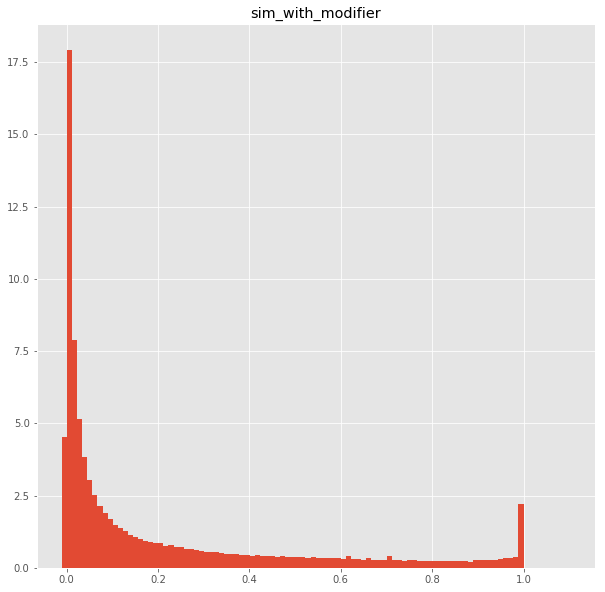

In [15]:
_=compound_modifier_sim.hist(column ='sim_with_modifier', figsize=(10, 10),bins=100,sharex=True,sharey=True,density=True,range=(-0.01,1.1))

### Similarity between Head and Compound

In [21]:
heads.columns=['head_count']

compound_head_sim=pd.merge(compounds.reset_index(),heads.reset_index(),on=["head","context"])

compound_head_sim['numerator']=compound_head_sim['comp_count']*compound_head_sim['head_count']

compound_head_sim=compound_head_sim.groupby(['modifier','head'])['numerator'].sum().to_frame()

compound_head_sim=pd.merge(compound_head_sim.reset_index(),compound_denom.reset_index(),on=["modifier","head"])

compound_head_sim=pd.merge(compound_head_sim,head_denom.reset_index(),on=["head"])

compound_head_sim['sim_with_head']=compound_head_sim['numerator']/(compound_head_sim['compound_denom']*compound_head_sim['head_denom'])
compound_head_sim.set_index(['modifier','head'],inplace=True)
compound_head_sim.drop(['numerator','compound_denom'],axis=1,inplace=True)
compound_head_sim

head_denom  sim_with_head
modifier        head                                     
a_n             aaaaa_n             55.000          1.000
                addison_n         5071.128          0.609
adherents_n     addison_n         5071.128          0.176
century_n       addison_n         5071.128          0.007
college_n       addison_n         5071.128          0.609
conceits_n      addison_n         5071.128          0.059
conferences_n   addison_n         5071.128          0.473
department_n    addison_n         5071.128          0.447
friend_n        addison_n         5071.128          0.037
group_n         addison_n         5071.128          0.560
invention_n     addison_n         5071.128          0.182
mechanism_n     addison_n         5071.128          0.052
mr_n            addison_n         5071.128          0.258
paper_n         addison_n         5071.128          0.123
play_n          addison_n         5071.128          0.071
premises_n      addison_n         5071.128          0.028
protection_n    addison_n         5071.128          0.023
qualification_n addison_n         5071.128          0.198
sales_n         addison_n         5071.128          0.309
secretary_n     addison_n         5071.128          0.016
technology_n    addison_n         5071.128          0.465
time_n          addison_n         5071.128          0.098
tv_n            addison_n         5071.128          0.609
university_n    addison_n         5071.128          0.615
view_n          addison_n         5071.128          0.226
a_n             anti_n          142846.328          0.004
abm_n           anti_n          142846.328          0.002
allied_n        anti_n          142846.328          0.006
american_n      anti_n          142846.328          0.487
and_n           anti_n          142846.328          0.000
...                                    ...            ...
youth_n         cleinias_n          43.000          1.000
                convertest_n       119.000          1.000
                daggoo_n           190.825          1.000
                diffident_n         66.000          1.000
                ferrau_n           131.522          1.000
                fidele_n            75.007          0.977
                greed_n             76.322          0.852
                hippostratus_n      47.000          1.000
                innumerous_n        56.569          1.000
                jabesh_n           130.000          1.000
                tormot_n            78.262          1.000
zealand_n       maories_n           74.713          1.000
                mesozoic_n          70.711          1.000
                savageism_n         99.282          1.000
                tramping_n         376.619          1.000
zebra_n         striping_n          52.000          1.000
zero_n          froude_n           759.997          0.061
                mostel_n           134.766          1.000
zeus_n          cadmos_n           159.198          1.000
                olympios_n         381.920          1.000
                olympius_n        3853.998          0.986
                polieus_n          218.634          1.000
zhuhai_n        sezs_n              80.000          1.000
zirconia_n      polycrystals_n      59.397          1.000
zocor_n         zocor_n            132.665          1.000
zone_n          aride_n            337.997          1.000
                contigue_n          89.000          1.000
                ophiolites_n        84.000          1.000
zones_n         synaptiques_n       66.468          1.000
zoo_n           pottet_n            28.000          1.000

[791659 rows x 2 columns]

In [24]:
compound_head_sim.sim_with_head.describe()

count   791659.000
mean         0.187
std          0.268
min          0.000
25%          0.010
50%          0.054
75%          0.254
max          1.000
Name: sim_with_head, dtype: float64

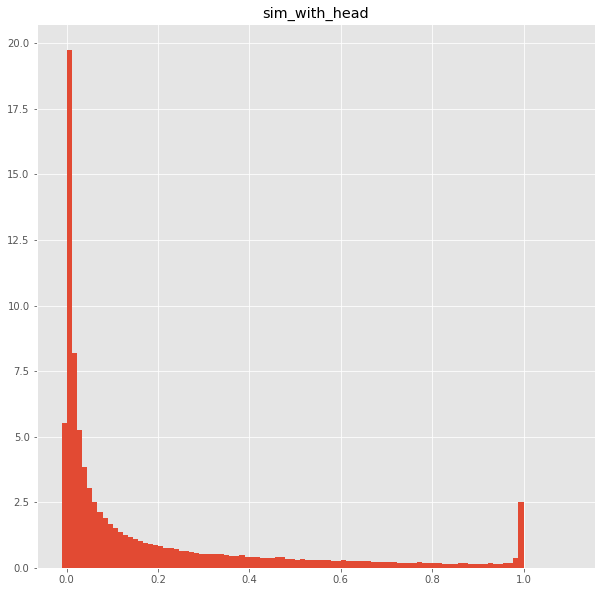

In [23]:
_=compound_head_sim.hist(column ='sim_with_head', figsize=(10, 10),bins=100,sharex=True,sharey=True,density=True,range=(-0.01,1.1))

In [30]:
constituent_sim=pd.merge(heads.reset_index(),compounds.reset_index(),on=["head","context"])
constituent_sim=pd.merge(constituent_sim,modifiers.reset_index(),on=["modifier","context"])
constituent_sim['numerator']=constituent_sim['head_count']*constituent_sim['mod_count']
constituent_sim=constituent_sim.groupby(['modifier','head'])['numerator'].sum().to_frame()
constituent_sim=pd.merge(constituent_sim.reset_index(),head_denom.reset_index(),on=["head"])
constituent_sim=pd.merge(constituent_sim,modifier_denom.reset_index(),on=["modifier"])
constituent_sim['sim_bw_constituents']=constituent_sim['numerator']/(constituent_sim['head_denom']*constituent_sim['modifier_denom'])
constituent_sim.set_index(['modifier','head'],inplace=True)
constituent_sim.drop(['numerator','modifier_denom','head_denom'],axis=1,inplace=True)
constituent_sim

sim_bw_constituents
modifier         head                               
a_n              aaaaa_n                       0.033
                 addison_n                     0.008
                 anti_n                        0.000
                 archive_n                     0.001
                 atom_n                        0.112
                 b_n                           0.546
                 ballet_n                      0.000
                 band_n                        0.127
                 baseball_n                    0.000
                 behavior_n                    0.000
                 bell_n                        0.000
                 bend_n                        0.000
                 berkley_n                     0.001
                 bibliography_n                0.025
                 bill_n                        0.003
                 bird_n                        0.000
                 board_n                       0.000
                 book_n                        0.000
                 boswell_n                     0.000
                 brand_n                       0.000
                 briefe_n                      0.004
                 bunch_n                       0.006
                 burn_n                        0.000
                 c_n                           0.146
                 calendar_n                    0.000
                 call_n                        0.000
                 campaign_n                    0.003
                 cassell_n                     0.013
                 cat_n                         0.084
                 cataloguing_n                 0.030
...                                              ...
vertebra_n       prominens_n                   1.000
vertically_n     integrate_n                   0.459
                 linked_n                      0.889
vesicoureteral_n reflux_n                      0.381
vespertilio_n    horribilis_n                  0.736
vestigia_n       communia_n                    0.821
vetements_n      ondoyants_n                   1.000
vetera_n         commentarium_n                1.000
vg_n             wort_n                        0.850
viburnum_n       prunifolium_n                 1.000
violoncello_n    fantasia_n                    0.164
winnetka_n       graded_n                      0.360
vivant_n         denon_n                       0.294
vizier_n         sujah_n                       0.042
voir_n           dire_n                        0.719
vraies_n         faiblesses_n                  1.000
wack_n           wack_n                        0.395
warburgand_n     courtauld_n                   1.000
waties_n         waring_n                      0.114
waxen_n          chatterer_n                   0.627
wearside_n       tradespools_n                 1.000
webers_n         diagnose_n                    0.756
                 sicht_n                       0.997
westphalian_n    wilhelms_n                    0.772
wheeles_n        resembles_n                   1.000
wintres_n        weders_n                      0.939
wommennes_n      conseils_n                    0.598
wystan_n         auden_n                       0.282
yom_n            kippur_n                      1.000
zhuhai_n         sezs_n                        0.307

[776125 rows x 1 columns]

In [32]:
constituent_sim.sim_bw_constituents.describe()

count   776125.000
mean         0.082
std          0.171
min          0.000
25%          0.000
50%          0.003
75%          0.051
max          1.000
Name: sim_bw_constituents, dtype: float64

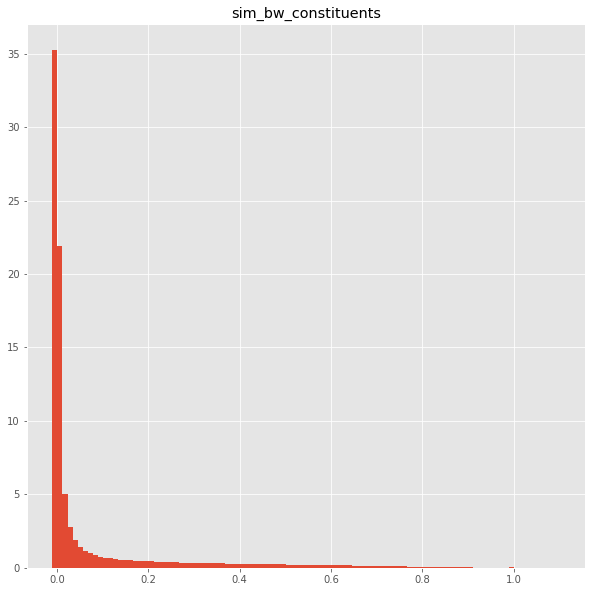

In [31]:
_=constituent_sim.hist(column ='sim_bw_constituents', figsize=(10, 10),bins=100,sharex=True,sharey=True,density=True,range=(-0.01,1.1))

In [36]:
dfs = [constituent_sim.reset_index(), compound_head_sim.reset_index(), compound_modifier_sim.reset_index(), information_feat.reset_index()]
compounds_final = reduce(lambda left,right: pd.merge(left,right,on=['modifier','head']), dfs)
compounds_final.drop(['head_denom','modifier_denom'],axis=1,inplace=True)
#compounds_final=pd.pivot_table(compounds_final, index=['modifier','head'], columns=['decade'])
compounds_final.set_index(['modifier','head'],inplace=True)
compounds_final.fillna(0,inplace=True)
compounds_final -= compounds_final.min()
compounds_final /= compounds_final.max()
#compounds_final_1=compounds_final.columns.get_level_values(0)
#compounds_final_2=compounds_final.columns.get_level_values(1)

#cur_year=0
#new_columns=[]
#for year in compounds_final_2:
    #new_columns.append(str(year)+"_"+compounds_final_1[cur_year])
    #cur_year+=1
#compounds_final.columns=new_columns
compounds_final

sim_bw_constituents  sim_with_head  \
modifier         head                                                 
a_n              aaaaa_n                       0.033          1.000   
                 addison_n                     0.008          0.609   
                 anti_n                        0.000          0.004   
                 archive_n                     0.001          0.026   
                 atom_n                        0.112          0.616   
                 b_n                           0.546          0.536   
                 ballet_n                      0.000          0.005   
                 band_n                        0.127          0.164   
                 baseball_n                    0.000          0.085   
                 behavior_n                    0.000          0.013   
                 bell_n                        0.000          0.024   
                 bend_n                        0.000          0.040   
                 berkley_n                     0.001          0.044   
                 bibliography_n                0.025          0.373   
                 bill_n                        0.003          0.247   
                 bird_n                        0.000          0.016   
                 board_n                       0.000          0.001   
                 book_n                        0.000          0.000   
                 boswell_n                     0.000          0.036   
                 brand_n                       0.000          0.016   
                 briefe_n                      0.004          0.820   
                 bunch_n                       0.006          0.254   
                 burn_n                        0.000          0.004   
                 c_n                           0.146          0.386   
                 calendar_n                    0.000          0.009   
                 call_n                        0.000          0.000   
                 campaign_n                    0.003          0.034   
                 cassell_n                     0.013          0.895   
                 cat_n                         0.084          0.249   
                 cataloguing_n                 0.030          0.860   
...                                              ...            ...   
vertebra_n       prominens_n                   1.000          1.000   
vertically_n     integrate_n                   0.459          1.000   
                 linked_n                      0.889          1.000   
vesicoureteral_n reflux_n                      0.381          0.384   
vespertilio_n    horribilis_n                  0.736          1.000   
vestigia_n       communia_n                    0.821          0.985   
vetements_n      ondoyants_n                   1.000          1.000   
vetera_n         commentarium_n                1.000          1.000   
vg_n             wort_n                        0.850          0.850   
viburnum_n       prunifolium_n                 1.000          1.000   
violoncello_n    fantasia_n                    0.164          0.164   
winnetka_n       graded_n                      0.360          0.874   
vivant_n         denon_n                       0.294          0.294   
vizier_n         sujah_n                       0.042          0.178   
voir_n           dire_n                        0.719          0.789   
vraies_n         faiblesses_n                  1.000          1.000   
wack_n           wack_n                        0.395          1.000   
warburgand_n     courtauld_n                   1.000          1.000   
waties_n         waring_n                      0.114          0.161   
waxen_n          chatterer_n                   0.627          0.627   
wearside_n       tradespools_n                 1.000          1.000   
webers_n         diagnose_n                    0.756          1.000   
                 sicht_n                       0.997          1.000   
westphalian_n    wilhelms_n                    0.772     

In [37]:
compounds_final.to_csv("/data/dharp/compounding/datasets/dist_sem_non_decadal.csv")